
Classification Report:
              precision    recall  f1-score   support

       anger       0.92      0.94      0.93       392
        fear       0.96      0.92      0.94       416
         joy       0.94      0.96      0.95       380

    accuracy                           0.94      1188
   macro avg       0.94      0.94      0.94      1188
weighted avg       0.94      0.94      0.94      1188


Confusion Matrix:
 [[370   9  13]
 [ 23 383  10]
 [  8   9 363]]


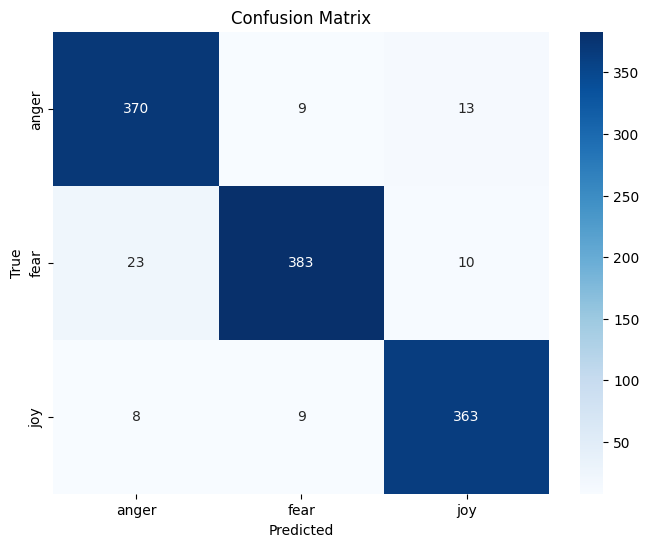

Sample prediction: joy
Model saved as 'emotion_detection_model.pkl'


In [1]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load dataset
file_path = '/content/drive/MyDrive/Emotion_classify_Data.csv'
df = pd.read_csv(file_path)

# Preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['Comment'] = df['Comment'].astype(str).apply(clean_text)

# Features and labels
X = df['Comment']
y = df['Emotion']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('svm', SVC(kernel='sigmoid'))
])

# Train
pipeline.fit(X_train, y_train)

# Evaluate
y_pred = pipeline.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Predict single sentence
sample = "I am so happy and excited today!"
cleaned_sample = clean_text(sample)
print("Sample prediction:", pipeline.predict([cleaned_sample])[0])

# Save model
joblib.dump(pipeline, 'emotion_detection_model.pkl')
print("Model saved as 'emotion_detection_model.pkl'")
